In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# WA County EV Data file path
WAEV_path = "Resources/WAEV_COUNTY_INFO.csv"

# Read the CSV into a Pandas DataFrame
WAEV_df = pd.read_csv(WAEV_path, low_memory=False)

# Print the first five rows of data to the screen
WAEV_df.columns

Index(['Unnamed: 0', 'VIN (1-10)', 'County', 'Longitude', 'Latitude'], dtype='object')

In [2]:
# Extract "VIN" and "County"
WAEV_red = WAEV_df.loc[:, ["VIN (1-10)", "County"]]
WAEV_red.head()

,VIN (1-10),County
0,5UXTA6C0XM,Kitsap
1,5YJ3E1EB1J,Kitsap
2,WP0AD2A73G,Snohomish
3,5YJ3E1EB5J,Kitsap
4,1N4AZ1CP3K,King


In [3]:
# Rename column "VIN (1-10)" to "VIN"
WAEV_red = WAEV_red.rename(columns={"VIN (1-10)": "VIN"})
WAEV_red.head()

,VIN,County
0,5UXTA6C0XM,Kitsap
1,5YJ3E1EB1J,Kitsap
2,WP0AD2A73G,Snohomish
3,5YJ3E1EB5J,Kitsap
4,1N4AZ1CP3K,King


In [4]:
# Check column datatypes
WAEV_red.dtypes

VIN       object
County    object
dtype: object

In [5]:
# Convert "County" datatype to string
WAEV_red = WAEV_red.astype({"County": "string",})
WAEV_red.dtypes

VIN               object
County    string[python]
dtype: object

In [6]:
# GroupBy County and Count VIN per county 
WAEV_bycou = WAEV_red.groupby(["County"])
WAEV_bycou.count().reset_index().head()

,County,VIN
0,Adams,66
1,Asotin,87
2,Benton,2624
3,Chelan,1279
4,Clallam,1253


In [7]:
# Save GroupBy data to CSV
WAEV_bycou.count().reset_index().to_csv("Resources/WAEV_BYCOU_TOTALS.csv", index=True)

In [8]:
# WA GroupBy County EV Data file path
WAEV_path2 = "Resources/WAEV_BYCOU_TOTALS.csv"

# Read the CSV into a Pandas DataFrame
WAEV_COU_TOL = pd.read_csv(WAEV_path2, low_memory=False)

WAEV_COU_TOL.head()

,Unnamed: 0,County,VIN
0,0,Adams,66
1,1,Asotin,87
2,2,Benton,2624
3,3,Chelan,1279
4,4,Clallam,1253


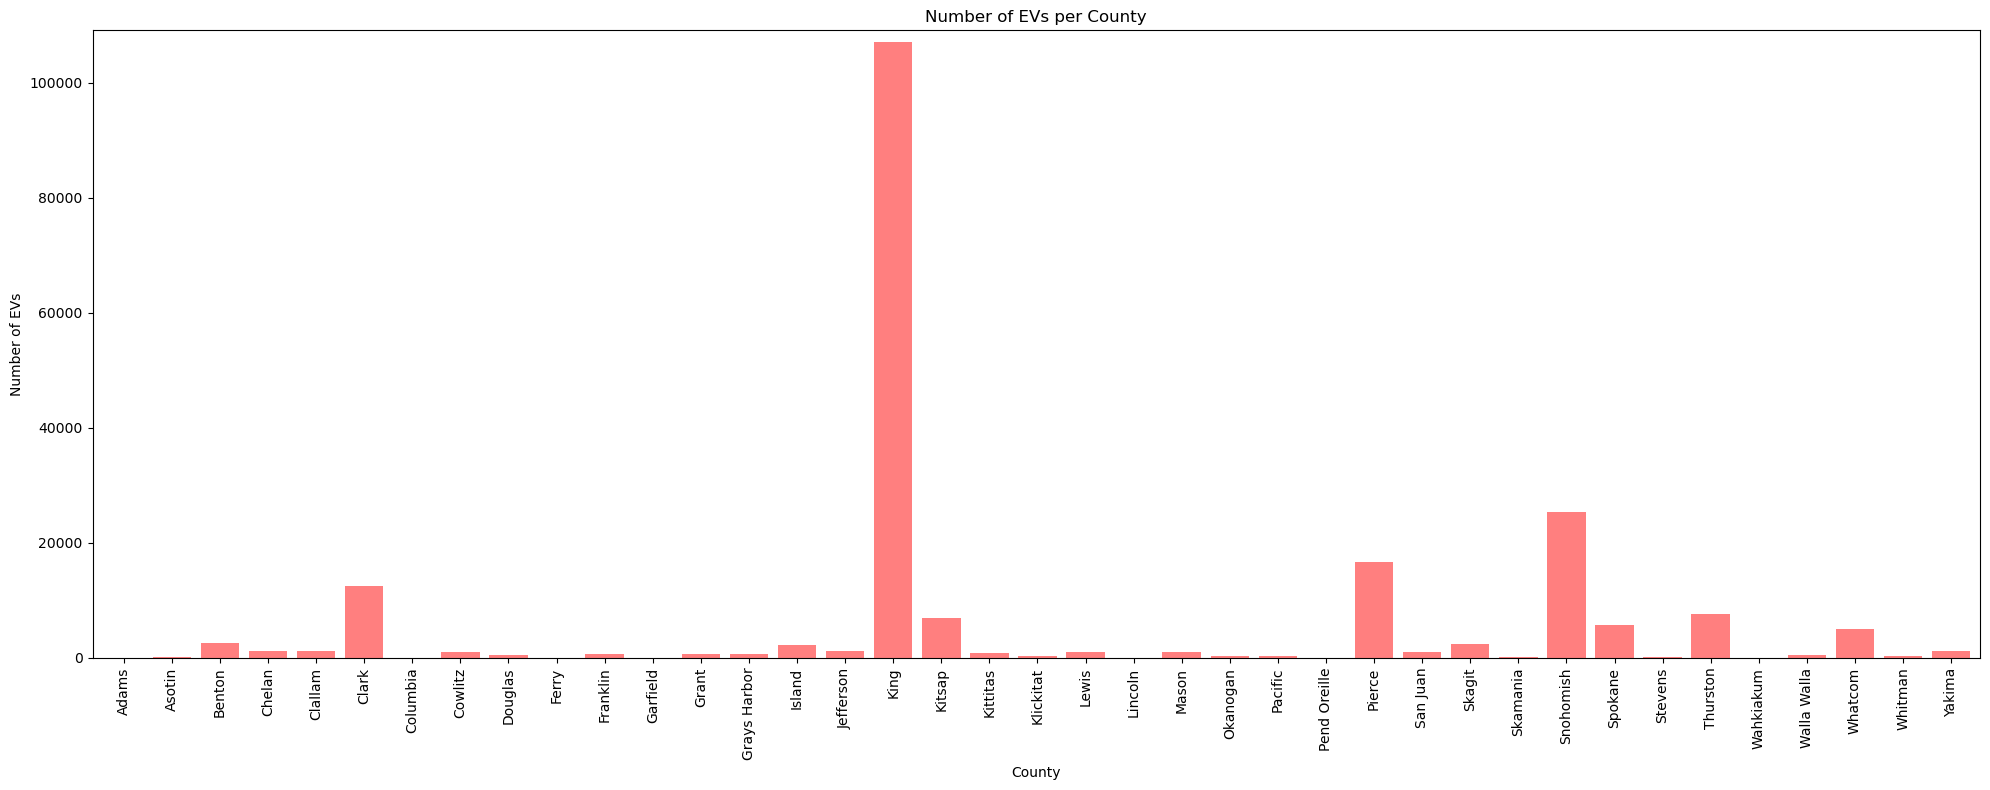

In [9]:
# Set x-axis and tick locations
x_axis = np.arange(len(WAEV_COU_TOL))
tick_locations = [value+0.4 for value in x_axis]

# Creating the barchart
plt.figure(figsize=(20,8))
plt.bar(x_axis, WAEV_COU_TOL["VIN"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, WAEV_COU_TOL["County"], rotation="vertical")


# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(WAEV_COU_TOL["VIN"])+2000)

# Set a Title and labels
plt.title("Number of EVs per County")
plt.xlabel("County")
plt.ylabel("Number of EVs")

plt.tight_layout()
plt.savefig("Images/WAEV_BYCOUNTY_BAR.png")

plt.show()